In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import folium

In [96]:
data = pd.read_csv(r'C:\Users\ABR\Desktop\ProjetFinal\belib_points_de_recharge_clean2.csv', sep=',')

In [97]:
data

,ID PDC local_x,Statut du Point de charge,Arrondissement_x,ID Station local,ID Station itinérance,Nom station,Code INSEE commune_x,Type implantation,Nombre point de recharge,Date mise à jour,...,Accessibilité PMR,Restriction gabarit,Stationnement 2 roues,Puissance max KW,Horaires,Statut du point de recharge,URL Description Point de charge,Heure mise à jour,latitude,longitude
0,FR*V75*E9006*02*3,En service,06e Arrondissement,FR*V75*P9006*02,FRV75P900602,Paris | Rue de Medicis 11,75106.0,Voirie,3,2021-09-23,...,Non accessible,aucune restriction,False,22.0,24/7,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,48.848240,2.339865
1,FR*V75*E9009*01*2,En service,09e Arrondissement,FR*V75*P9009*01,FRV75P900901,Paris | Boulevard de Clichy 31,75109.0,Voirie,3,2021-09-23,...,Non accessible,aucune restriction,False,4.0,24/7,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,48.882640,2.335728
2,FR*V75*E9013*04*1,En service,13e Arrondissement,FR*V75*P9013*04,FRV75P901304,Paris | Rue de l'Amiral Mouchez 77,75113.0,Voirie,3,2021-09-23,...,Non accessible,aucune restriction,False,22.0,24/7,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,48.820850,2.343626
3,FR*V75*E9014*03*3,En service,14e Arrondissement,FR*V75*P9014*03,FRV75P901403,Paris | Boulevard Edgar Quinet 9,75114.0,Voirie,3,2021-09-23,...,Non accessible,aucune restriction,False,22.0,24/7,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,48.841198,2.323891
4,FR*V75*E9016*06*1,En service,16e Arrondissement,FR*V75*P9016*06,FRV75P901606,Paris | Avenue Victor Hugo 45,75116.0,Voirie,3,2021-09-23,...,Non accessible,aucune restriction,False,22.0,24/7,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T04:30:01+02:00,48.871464,2.289894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,FR*V75*EPX19*16*4,En service,19e Arrondissement,FR*V75*PPX19*16,FRV75PPX1916,Paris | Rue Manin 1,75119.0,Voirie,4,2021-09-23,...,Non accessible,aucune restriction,False,7.0,24/7,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T14:39:06+01:00,48.876600,2.379018
2069,FR*V75*EPX13*21*2,En service,13e Arrondissement,FR*V75*PPX13*21,FRV75PPX1321,Paris | Avenue D'Ivry 58,75113.0,Voirie,5,2021-12-29,...,Non accessible,aucune restriction,False,7.0,24/7,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T15:00:02+01:00,48.824066,2.364308
2070,FR*V75*EPX13*21*3,En service,13e Arrondissement,FR*V75*PPX13*21,FRV75PPX1321,Paris | Avenue D'Ivry 58,75113.0,Voirie,5,2021-12-29,...,Non accessible,aucune restriction,False,7.0,24/7,Occupé (en charge),https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T15:01:05+01:00,48.824066,2.364308
2071,FR*V75*EHBSAE*PDA*02*1,En service,16e Arrondissement,FR*V75*PHBSAE*PDA,FRV75PHBSAEPDA,Paris | SAEMES Parking Porte d'Auteuil,75116.0,Parking public,15,2022-08-19,...,Non accessible,aucune restriction,False,43.0,24/7,Occupé (en charge),https://parisdata.opendatasoft.com/explore/dat...,2022-12-02T15:06:06+01:00,48.846973,2.255839


### Visualization

Correlation matrix

In [98]:
corr = data.corr()
corr.style.background_gradient (cmap = 'coolwarm')

,Code INSEE commune_x,Nombre point de recharge,Paiement CB,Stationnement 2 roues,Puissance max KW,latitude,longitude
Code INSEE commune_x,1.000000,-0.020694,-0.000739,-0.018014,-0.070909,0.202467,-0.021397
Nombre point de recharge,-0.020694,1.000000,0.444837,0.080016,0.415154,-0.017996,-0.055801
Paiement CB,-0.000739,0.444837,1.000000,0.081530,-0.409386,0.025623,-0.029512
Stationnement 2 roues,-0.018014,0.080016,0.081530,1.000000,-0.174102,-0.000446,0.006953
Puissance max KW,-0.070909,0.415154,-0.409386,-0.174102,1.000000,-0.042938,-0.052383
latitude,0.202467,-0.017996,0.025623,-0.000446,-0.042938,1.000000,0.033068
longitude,-0.021397,-0.055801,-0.029512,0.006953,-0.052383,0.033068,1.000000


### Creating the map and adding points to the Folium map

In [99]:
data['Nom station'].value_counts()

Paris | SAGS Parking Lobau                21
Paris | SAEMES Parking Porte d'Auteuil    15
Paris | Rue Darmesteter 12                 7
Paris | Rue Claude Decaen 26               7
Paris | bis Rue Valette 2                  7
                                          ..
Paris | Rue de Courcelles 83               3
Paris | Avenue Gourgaud 4                  3
Paris | Rue Baron le Roy 53                3
Paris | Boulevard Voltaire  8              2
Paris | Rue Léon Frot 26                   2
Name: Nom station, Length: 414, dtype: int64

In [100]:
data.columns

Index(['ID PDC local_x', 'Statut du Point de charge', 'Arrondissement_x',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       'Code INSEE commune_x', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d'accès', 'Adresse station_x',
       'Paiement CB', 'Tarification', 'Date mise en service',
       'Accessibilité PMR', 'Restriction gabarit', 'Stationnement 2 roues',
       'Puissance max KW', 'Horaires', 'Statut du point de recharge',
       'URL Description Point de charge', 'Heure mise à jour', 'latitude',
       'longitude'],
      dtype='object')

In [101]:
belib_stations = data[data['latitude'].notnull() & data['longitude'].notnull()]

In [102]:
# Create a map centered on Paris
paris_map = folium.Map(location=[48.864716, 2.349014], tiles='openstreetmap', zoom_start=11)

# Add points to the map
for idx, row in belib_stations.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']],
           popup=row['Adresse station_x']).add_to(paris_map)
           

# Display the map
paris_map

### EDA

In [103]:
data.columns

Index(['ID PDC local_x', 'Statut du Point de charge', 'Arrondissement_x',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       'Code INSEE commune_x', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d'accès', 'Adresse station_x',
       'Paiement CB', 'Tarification', 'Date mise en service',
       'Accessibilité PMR', 'Restriction gabarit', 'Stationnement 2 roues',
       'Puissance max KW', 'Horaires', 'Statut du point de recharge',
       'URL Description Point de charge', 'Heure mise à jour', 'latitude',
       'longitude'],
      dtype='object')

# Type of Paiement

Histogram

In [104]:
data['Type_de_paiement'] = np.where(data["Paiement CB"]==False, 'autres', 'CB')

In [105]:
data['Type_de_paiement']

0       autres
1       autres
2       autres
3       autres
4       autres
         ...  
2068        CB
2069        CB
2070        CB
2071        CB
2072        CB
Name: Type_de_paiement, Length: 2073, dtype: object

In [106]:
#plt.style.use('classic')
#plt.style.use('Solarize_Light2')
plt.style.use('dark_background')

Text(0.5, 1.0, '\nType de paiement\n')

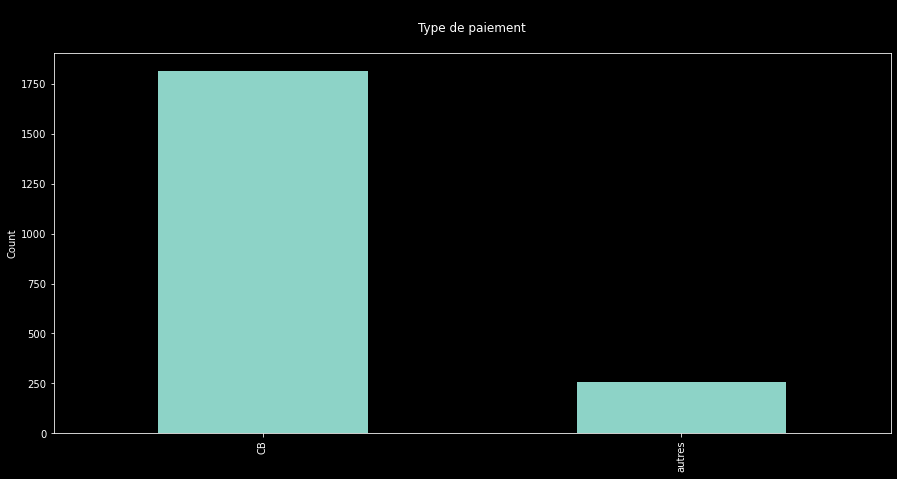

In [107]:
data['Type_de_paiement'].value_counts().plot(kind="bar",figsize=(15,7))
plt.ylabel('Count')
plt.title('\nType de paiement\n')

In [108]:
data["Type_de_paiement"].value_counts()

CB        1816
autres     257
Name: Type_de_paiement, dtype: int64

# Distribution of the offer in terms of power

Violin

Text(0.5, 1.0, '\nDistribution of max power \n')

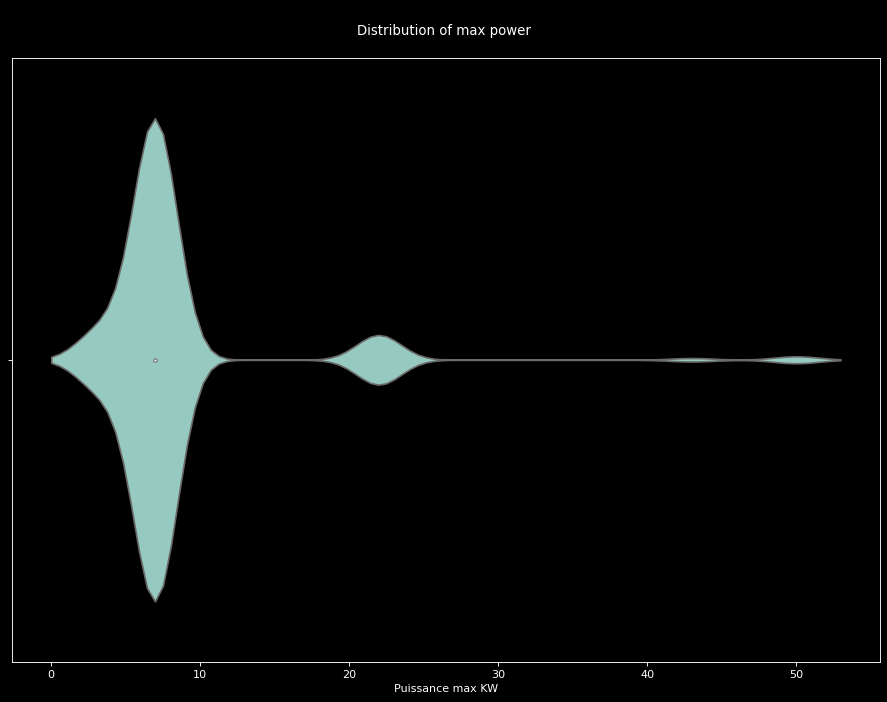

In [109]:
figure(figsize=(14, 10), dpi=80)
sns.violinplot(x=data["Puissance max KW"])
plt.title('\nDistribution of max power \n')

# Skewness

In [110]:
data['Puissance max KW'].skew()

3.9287196556134916

we can see 2 pics 7KW and 22kW
and in less quantity 43KW and 50KW for the super chargers

In [111]:
data['Puissance max KW'].unique()

array([22.,  4.,  7.,  3., 43., 50.])

In [112]:
data['Statut du point de recharge'].unique()

array(['En maintenance', 'Inconnu', 'Disponible', 'Occupé (en charge)'],
      dtype=object)

In [113]:
data.columns

Index(['ID PDC local_x', 'Statut du Point de charge', 'Arrondissement_x',
       'ID Station local', 'ID Station itinérance', 'Nom station',
       'Code INSEE commune_x', 'Type implantation', 'Nombre point de recharge',
       'Date mise à jour', 'Conditions d'accès', 'Adresse station_x',
       'Paiement CB', 'Tarification', 'Date mise en service',
       'Accessibilité PMR', 'Restriction gabarit', 'Stationnement 2 roues',
       'Puissance max KW', 'Horaires', 'Statut du point de recharge',
       'URL Description Point de charge', 'Heure mise à jour', 'latitude',
       'longitude', 'Type_de_paiement'],
      dtype='object')

# Repartition of the power by arrondissement

In [114]:
from matplotlib.pyplot import figure

Text(0.5, 1.0, '\nRepartition of max power by arrondissement\n')

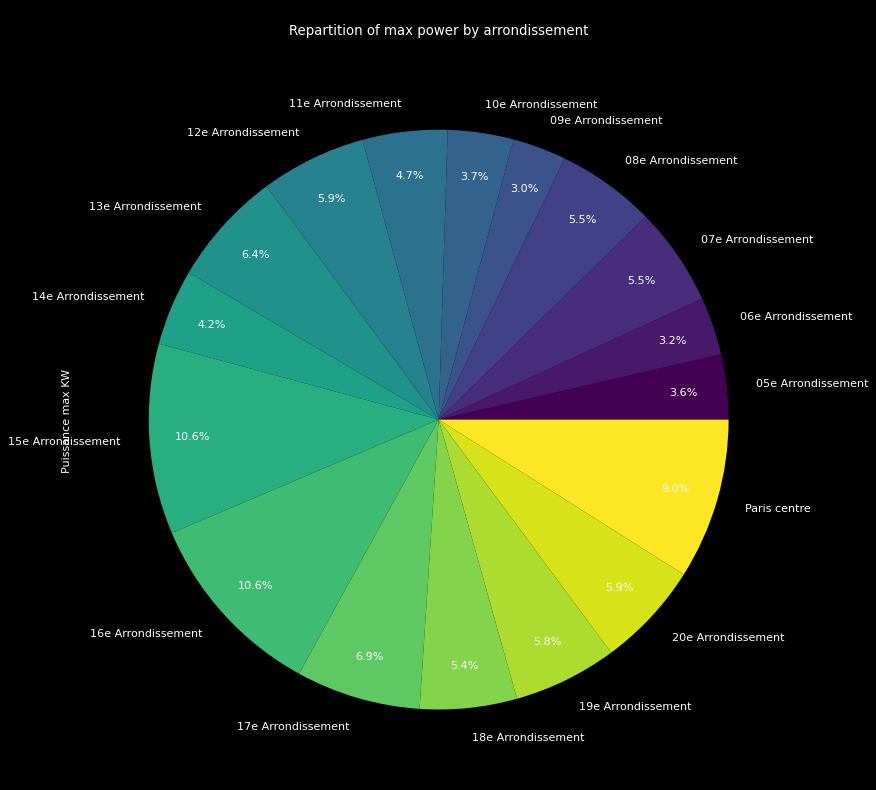

In [115]:
figure(figsize=(16, 12), dpi=80)
data.groupby(['Arrondissement_x'])['Puissance max KW'].count().plot.pie( autopct="%.1f%%", pctdistance=0.85, cmap='viridis')
plt.title('\nRepartition of max power by arrondissement\n')

# Statut du point de recharge

Text(0.5, 1.0, '\nStatut du point de recharge\n')

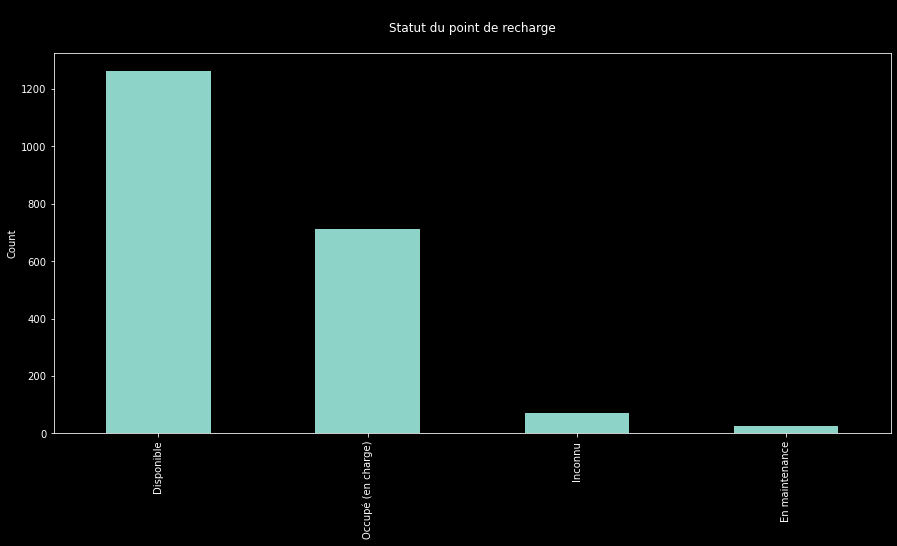

In [116]:
data['Statut du point de recharge'].value_counts().plot(kind="bar",figsize=(15,7))
plt.ylabel('Count')
plt.title('\nStatut du point de recharge\n')

In [117]:
data['Statut du point de recharge'].value_counts()

Disponible            1263
Occupé (en charge)     711
Inconnu                 72
En maintenance          27
Name: Statut du point de recharge, dtype: int64

Text(0.5, 1.0, '\nRepartition of the number of charger points\n')

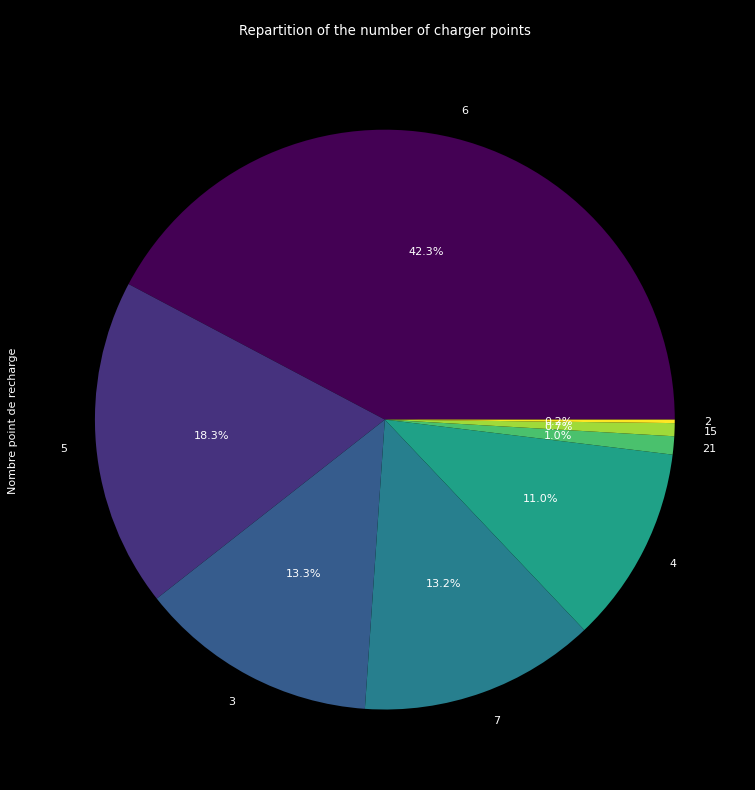

In [118]:
figure(figsize=(16, 12), dpi=80)
data['Nombre point de recharge'].value_counts().plot.pie(autopct="%.1f%%",cmap='viridis')
plt.title('\nRepartition of the number of charger points\n')